In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_countries = pd.read_csv('../datasets/paises.csv', delimiter=';')
df_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


In [3]:
df_space = pd.read_csv('../datasets/space.csv', delimiter=';')
df_space.head()

,Num,Company Name,Location,Datum,Detail,Status Rocket,Cost,Status Mission
0,0,SpaceX,LC-39A Kennedy Space Center Florida USA,Fri Aug 07 2020 05:12 UTC,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,CASC,Site 9401 (SLS-2) Jiuquan Satellite Launch Cen...,Thu Aug 06 2020 04:01 UTC,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,Pad A Boca Chica Texas USA,Tue Aug 04 2020 23:57 UTC,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,3,Roscosmos,Site 200/39 Baikonur Cosmodrome Kazakhstan,Thu Jul 30 2020 21:25 UTC,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,ULA,SLC-41 Cape Canaveral AFS Florida USA,Thu Jul 30 2020 11:50 UTC,Atlas V 541 | Perseverance,StatusActive,145.00,Success


1 - Por meio do dataset paises.csv, trace dois gráficos de linhas em um mesmo plano cartesiano, um mostrando a taxa de mortalidade (Deathrate) e outro a taxa de natalidade (Birthrate) dos países da América do Norte;

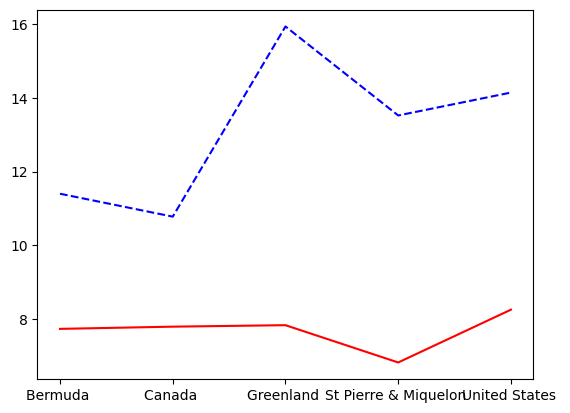

In [4]:
north_america = df_countries[df_countries['Region'].str.contains('NORTHERN AMERICA')]
plt.plot(
    north_america['Country'], north_america['Deathrate'], 'r-',
    north_america['Country'], north_america['Birthrate'], 'b--'
)

2 - Por meio do dataset space.csv, trace um gráfico em barras mostrando quantas empresas espaciais diferentes os EUA e a CHINA possuem;
Dica: não se esqueça de retirar os resultados repetidos

<BarContainer object of 2 artists>

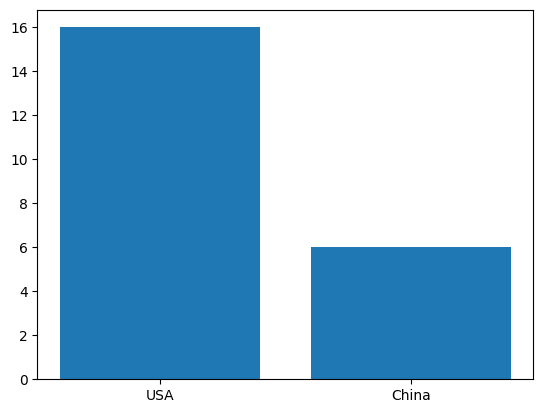

In [5]:
usa_count = len(df_space[df_space['Location'].str.contains('USA')]['Company Name'].unique())
china_count = len(df_space[df_space['Location'].str.contains('China')]['Company Name'].unique())

plt.bar(('USA', 'China'), (usa_count, china_count))


3 - Por meio do dataset space.csv, trace um gráfico em torta ilustrando a porcentagem de missões da empresa Roscosmos que deram certo e que deram errado;


51
4


([<matplotlib.patches.Wedge at 0x17ddd4403e0>,
 [Text(-1.0714131504339635, 0.2491462644254763, '% missões com sucesso'),
  Text(1.0714131722150184, -0.2491461707595592, '% missões sem sucesso')],
 [Text(-0.58440717296398, 0.13589796241389615, '92.7%'),
  Text(0.5844071848445554, -0.1358979113233959, '7.3%')])

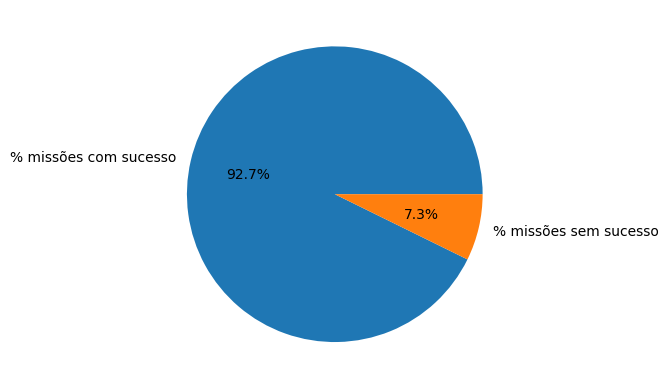

In [6]:
roscosmos_missions = df_space[df_space['Company Name'] == 'Roscosmos'] 
total_missions = len(roscosmos_missions)
success_count = len(roscosmos_missions[roscosmos_missions['Status Mission'] == 'Success'])
non_success_count = len(roscosmos_missions[roscosmos_missions['Status Mission'] != 'Success'])

print(success_count)
print(non_success_count)

success_prct = (success_count / total_missions) * 100
non_success_prct = (non_success_count / total_missions) * 100

plt.pie(
    x=[success_prct, non_success_prct],
    labels=['% missões com sucesso','% missões sem sucesso'], 
    autopct='%1.1f%%'
)